![image.png](attachment:image.png)

# Regresión Logística vs Arbol de Decision

# VERRR

https://www.geeksforgeeks.org/basic-concept-classification-data-mining/?ref=lbp

In [ ]:
# TEST

https://towardsdatascience.com/when-logistic-regression-simply-doesnt-work-8cd8f2f9d997

In [39]:
import pandas as pd
import numpy as np

size = 20000

X = pd.DataFrame()
X['temprature_outside'] = np.random.randint(10,40, size = size)
X['air_conditioning'] = np.random.randint(0,2, size=size)

y = X.apply(lambda row: 
            row['temprature_outside'] + 10* row['air_conditioning'] 
            if row['temprature_outside'] < 25 
            else row['temprature_outside'] - 10* row['air_conditioning'], axis=1)

y1 = ['Hot' if v > 25 else 'Cold' for v in y]


# if row['air_conditioning'] == 1: #evalua si esta prendido o no
#    row['temprature_outside'] +10 #suma los 10 si esta prendido
#    if row['temprature_outside'] < 25: # evalua si la temperatura es menor a 25
#      row['temprature_outside'] - 10* row['air_conditioning'] # le resta 10


"\nif row['air_conditioning'] == 1: #evalua si esta prendido o no\n   row['temprature_outside'] +10 #suma los 10 si esta prendido\n   if row['temprature_outside'] < 25: # evalua si la temperatura es menor a 25\n     row['temprature_outside'] - 10* row['air_conditioning'] # le resta 10\n"

In [40]:
X.head(5)

,temprature_outside,air_conditioning
0,37,0
1,19,0
2,30,1
3,31,0
4,38,1


In [41]:
y

0        37
1        19
2        20
3        31
4        28
         ..
19995    20
19996    28
19997    38
19998    20
19999    29
Length: 20000, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

In [44]:
pd.DataFrame({'temprature_outside': X_test['temprature_outside'], 
              'air_conditioning': X_test['air_conditioning'], 
              'Ground Truth': y_test, 
              'Prediction': clf.predict(X_test)})[:10] #

,temprature_outside,air_conditioning,Ground Truth,Prediction
10650,12,0,Cold,Cold
2041,20,1,Hot,Cold
8668,34,0,Hot,Hot
1114,14,1,Cold,Cold
13902,30,1,Cold,Hot
11963,25,0,Cold,Cold
11072,30,1,Cold,Hot
3002,13,0,Cold,Cold
19771,36,0,Hot,Hot
8115,12,0,Cold,Cold


![1-_bEPXvZD5cWqOBQxgkddmA.png](attachment:1-_bEPXvZD5cWqOBQxgkddmA.png)

In [45]:
clf.score(X_test, y_test)

0.7125

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

In [47]:
pd.DataFrame({'temprature_outside': X_test['temprature_outside'], 
              'air_conditioning': X_test['air_conditioning'], 
              'Ground Truth': y_test, 
              'Prediction': clf.predict(X_test)})[:10]

,temprature_outside,air_conditioning,Ground Truth,Prediction
10650,12,0,Cold,Cold
2041,20,1,Hot,Hot
8668,34,0,Hot,Hot
1114,14,1,Cold,Cold
13902,30,1,Cold,Cold
11963,25,0,Cold,Cold
11072,30,1,Cold,Cold
3002,13,0,Cold,Cold
19771,36,0,Hot,Hot
8115,12,0,Cold,Cold


In [48]:
clf.score(X_test, y_test)

1.0

[Text(0.5, 0.9, 'temprature_outside <= 15.5\ngini = 0.495\nsamples = 100.0%\nvalue = [0.551, 0.449]\nclass = Cold'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 19.9%\nvalue = [1.0, 0.0]\nclass = Cold'),
 Text(0.625, 0.7, 'temprature_outside <= 35.5\ngini = 0.492\nsamples = 80.1%\nvalue = [0.439, 0.561]\nclass = Hot'),
 Text(0.5, 0.5, 'air_conditioning <= 0.5\ngini = 0.499\nsamples = 67.1%\nvalue = [0.524, 0.476]\nclass = Cold'),
 Text(0.25, 0.3, 'temprature_outside <= 25.5\ngini = 0.5\nsamples = 33.8%\nvalue = [0.498, 0.502]\nclass = Hot'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 16.8%\nvalue = [1.0, 0.0]\nclass = Cold'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 17.0%\nvalue = [0.0, 1.0]\nclass = Hot'),
 Text(0.75, 0.3, 'temprature_outside <= 24.5\ngini = 0.495\nsamples = 33.3%\nvalue = [0.551, 0.449]\nclass = Cold'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 15.0%\nvalue = [0.0, 1.0]\nclass = Hot'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 18.3%\nvalue = [1.0, 0.0]\nclass = Cold'),
 Tex

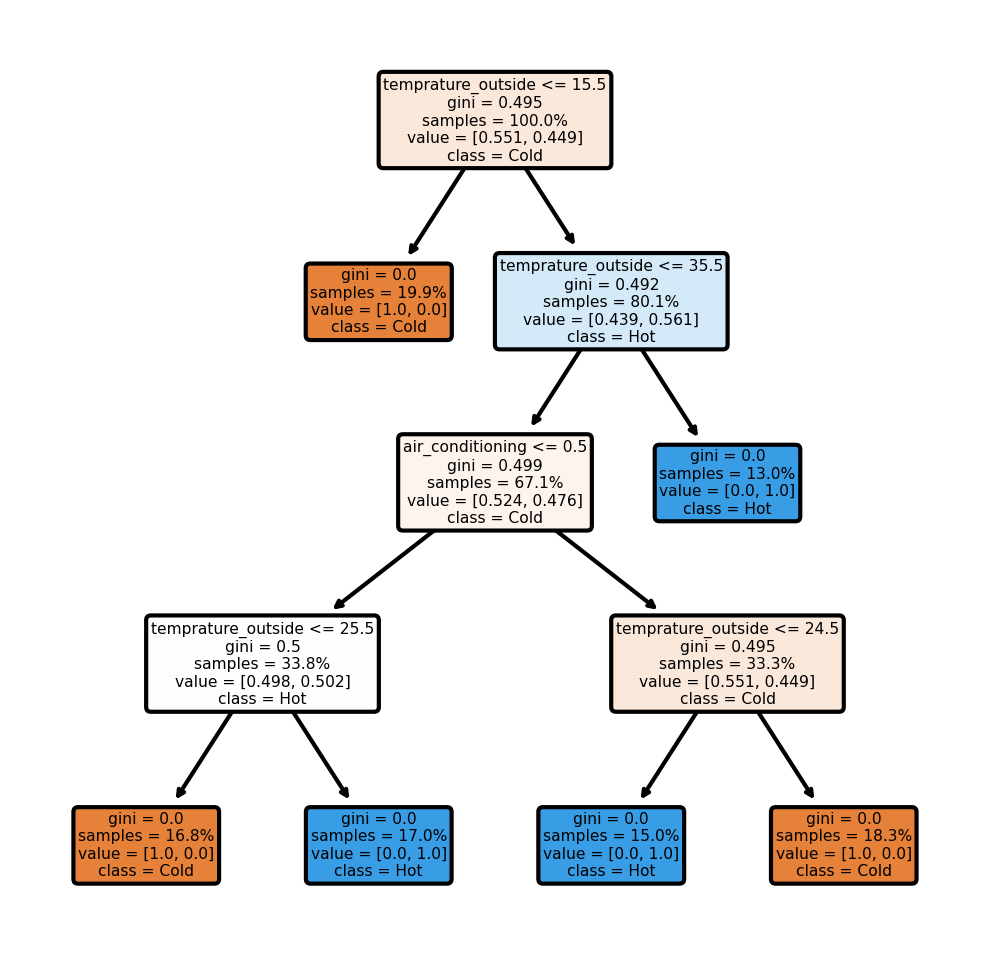

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf, ax= ax, feature_names = X_train.columns, 
               class_names=clf.classes_, filled = True, 
               proportion = True, rounded=True)

![1-sloI0u16ldP_Q1gIJQ73sQ.png](attachment:1-sloI0u16ldP_Q1gIJQ73sQ.png)

In [50]:
X['is_heating'] = (X['temprature_outside']<25).astype(int)*X['air_conditioning']
X['is_cooling'] = (X['temprature_outside']>=25).astype(int)*X['air_conditioning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.2005